# Assignment on Classification



In [1]:
#import various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to python environment

In [2]:
#read data set
data=pd.read_excel(r"H:\C\user\Downloads\iris.xls")

In [3]:
#return first 5 rows 
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do the necessary pre-processing steps

In [4]:
#check shape of data
data.shape

(150, 5)

In [5]:
# get information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# returns description of data in dataframe 
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# returns datatypes in data set
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [8]:
#check for missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
#replace null values
#take null value columns in a SET and replace null values with median
num= data[[ 'SL', 'SW', 'PL']]

In [10]:
for i in num:
    data[i].fillna(data[i].median(),inplace=True)

In [11]:
#after replace null values with median and check for null values

In [12]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
#here now null values are replaced with median


#checking and handling outliers

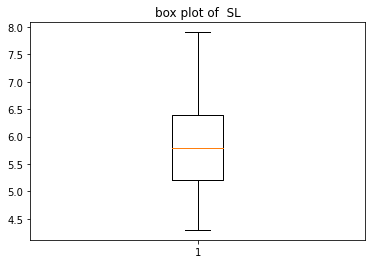

In [14]:
#box plot of SL to check outliers
plt.boxplot(data['SL'])
plt.title('box plot of  SL')
plt.show()

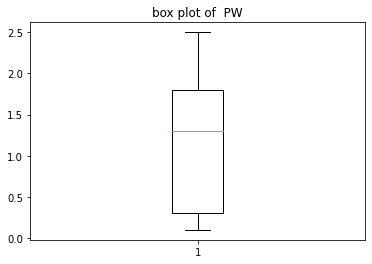

In [15]:
#boxplot of PW to check outliers
plt.boxplot(data['PW'])
plt.title('box plot of  PW')
plt.show()

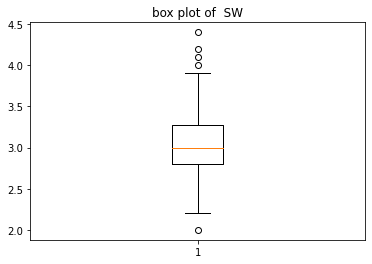

In [16]:
# boxplot of SW to check outliers
plt.boxplot(data['SW'])
plt.title('box plot of  SW')
plt.show()

In [17]:
#outliers detected
# finding outliers by Interquartile range method.
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')


In [18]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [19]:
#check for median in SW
data['SW'].median()

3.0

In [20]:
#find IQR
IQR=Q3-Q1
print(IQR)


0.4500000000000002


In [21]:
#DETECTING OUTLIERS
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [22]:
outlier=[]
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [23]:
#OUTLIER VALUES
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [24]:
#LENGTH OF OUTLIER VALUES
len(outlier)

5

In [25]:
ind=data['SW']>up_lim

In [26]:
#INDEX VALUES OF OUTLIERS GREATER THAN UPPER LIMIT
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [27]:
ind1=data['SW']<low_lim

In [28]:
#INDEX VALUES OF OUTLIERS lesser THAN lower LIMIT
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

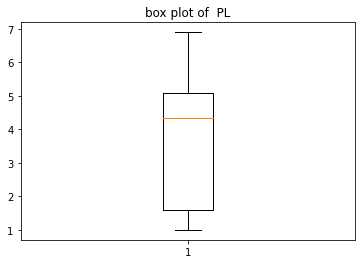

In [29]:
plt.boxplot(data['PL'])
plt.title('box plot of  PL')
plt.show()

In [30]:
#seperation of target and feature
y=data['Classification']
X=data.drop('Classification',axis=1)

In [31]:
X.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
#MINMAX SCALING

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
min_maxscaler=MinMaxScaler(feature_range=(0,1))

In [35]:
X=min_maxscaler.fit_transform(X)

In [36]:
X=pd.DataFrame(X,columns=['SL','SW','PL','PW'])

In [37]:
X.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.436389,0.471186,0.457778
std,0.224602,0.175831,0.293123,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# 3. Find out which classification model gives the best result (also do random      forest algorithm) 

In [38]:
#SPLIT THE DATA INTO TRAINING AND TESTING

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# creating logistic reg model 

In [41]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)

In [42]:
y_pred_logit

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [43]:
#evaluating model

In [44]:
# confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import classification_report



In [46]:
confusion_matrix(y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [47]:
 accuracy_score(y_test,y_pred_logit)

0.9666666666666667

In [48]:
#THE ACCURACY OF LOGISTIC REGRESSION IS 96.66%


In [49]:
print(classification_report(y_test,y_pred_logit))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



# knn model


In [50]:
#creating KNN model
from sklearn.neighbors import KNeighborsClassifier

In [51]:
metric_k=[]

In [52]:
neighbors=range(3,15)

In [53]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

In [54]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

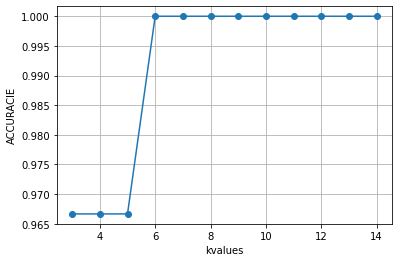

In [55]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('kvalues')
plt.ylabel('ACCURACIE')
plt.grid()


In [56]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [57]:
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred_kNN)

1.0

In [59]:
#ACCURACY IS 100%

In [60]:
print(classification_report(y_test,y_pred_kNN))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [61]:
# RECALL ,PRECISION ,ACCURACY IS 100%


# SVM MODEL

#    # svm linear

In [62]:
from sklearn.svm import SVC

In [63]:
svm_clf=SVC(kernel='linear')

In [64]:
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [65]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [66]:
accuracy_score(y_test,y_pred_svm)

1.0

In [67]:
print(classification_report(y_test,y_pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [68]:
#ACCURACY ,RECALL,PRECISION IN SVM LINEAR IS 100%

# SVM-RADIAL BASIS FUNCTION

In [69]:
svm_clf2=SVC(kernel='rbf')
svm_clf2=svm_clf2.fit(X_train,y_train)
y_pred_svm2=svm_clf2.predict(X_test)

In [70]:
confusion_matrix(y_test,y_pred_svm2)


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [71]:
accuracy_score(y_test,y_pred_svm2)

0.9666666666666667

In [72]:
print(classification_report(y_test,y_pred_svm2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [73]:
#ACUURACY,RECALL PRECISION IS ALMOST 97% IN RBF
#SVM LINEAR MODEL IS HIGHLY ACCURATE

# DECISION TREE

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

In [76]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred_dt)

1.0

In [78]:
print(classification_report(y_test,y_pred_dt))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [79]:
#ACUURACY,RECALL PRECISION IS ALMOST 100% in DECISION FOREST

# RANDOM FOREST ALGORITHM

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [82]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [83]:
accuracy_score(y_test,y_pred_rf)

1.0

In [84]:
print(classification_report(y_test,y_pred_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [85]:
#ACUURACY,RECALL PRECISION IS  100% in RANDOM FOREST

# BY ANALYSING VARIOUS CLASSIFICATION MODEL SUCH AS LOGISTIC REGRESSION, KNN MODEL,SVM-LINEAR,SVM RADIAL  BASIS FUNCTION ,DECISION TREE,RANDOM FOREST ALGORITHM IN IRIS DATA SET


In [86]:
#THE ACCURACY IN LOGISTIC REGRESSION IS 96.66%
#THE ACCURACY IN KNN MODEL IS 100%
#THE ACCURACY IN SVM-LINEAR IS 100%
#THE ACCURACY IN SVM-RADIAL BASIS FUNCTION IS 96.66%
#THE ACCURACY IN DECISION FOREST IS 100%
#THE ACCURACY IN RANDOM FOREST IS 100%



# THE CLASSIFICATION MODELS : KNN,SVM-LINEAR,DECISION FOREST,RANDOM FOREST GIVES 100% ACCURACY, WHILE SVM-RBF AND LOGISTIC REGRESSION GIVES ONLY 96.66% ACCURACY
        

THE BEST FIT CLASSIFICATION MODEL FOR THE GIVEN IRIS DATA SET IS KNN,SVM-LINEAR,DECISION FOREST,RANDOM FOREST BECAUSE OF 100% ACCURACY